In [5]:
import psycopg2
import pandas as pd

# Kết nối đến PostgreSQL (sử dụng tên container Docker)
conn = psycopg2.connect(
    dbname="crypto_db",
    user="user",
    password="pass",
    host="localhost",  # Tên container trong Docker Compose
    port="5432"
)


Xem dữ liệu mới nhất:

In [7]:
query = """
SELECT * FROM fact_crypto_price
ORDER BY timestamp DESC
LIMIT 10
"""

df = pd.read_sql_query(query, conn)
df


C:\Users\Tger\AppData\Local\Temp\ipykernel_21612\4114318346.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,id,symbol,price_usd,market_cap,volume_24h,percent_change_24h,timestamp
0,600,usdc,1.000000,848927674.0,37669216.0,0.00151,2025-04-26 05:18:43.127460
1,599,reth,2025.090000,862561211.0,5896457.0,1.44118,2025-04-26 05:18:43.127376
2,598,jasmy,0.018065,875246362.0,113822211.0,8.52137,2025-04-26 05:18:43.127293
3,597,bsv,44.440000,880752816.0,463564379.0,31.41756,2025-04-26 05:18:43.127209
4,596,pyusd,0.999934,884175973.0,16986441.0,-0.02032,2025-04-26 05:18:43.127123
5,595,usdt0,1.000000,893639300.0,233058615.0,-0.01438,2025-04-26 05:18:43.127034
6,594,wbnb,601.100000,910315140.0,269197605.0,-0.79658,2025-04-26 05:18:43.126928
7,593,crv,0.694734,926692472.0,221040282.0,4.11185,2025-04-26 05:18:43.126791
8,592,grt,0.104175,994743124.0,70770458.0,8.50984,2025-04-26 05:18:43.126672
9,591,inj,10.220000,998473964.0,112044546.0,2.23600,2025-04-26 05:18:43.126588


Trung bình giá theo coin:

In [8]:
query = """
SELECT symbol, ROUND(AVG(price_usd), 2) AS avg_price
FROM fact_crypto_price
GROUP BY symbol
ORDER BY avg_price DESC
"""

df_avg = pd.read_sql_query(query, conn)
df_avg


C:\Users\Tger\AppData\Local\Temp\ipykernel_21612\3421650188.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg = pd.read_sql_query(query, conn)


,symbol,avg_price
0,btc,91094.67
1,cbbtc,91087.50
2,solvbtc,91057.00
3,wbtc,91042.50
4,lbtc,90776.83
...,...,...
95,flr,0.02
96,jasmy,0.02
97,bonk,0.00
98,shib,0.00


Top 5 đồng coin có Market Cap cao nhất gần đây:

In [9]:
query = """
SELECT symbol, price_usd, market_cap, timestamp
FROM fact_crypto_price
WHERE timestamp = (SELECT MAX(timestamp) FROM fact_crypto_price)
ORDER BY market_cap DESC
LIMIT 5
"""
df_top5 = pd.read_sql(query, conn)
df_top5


C:\Users\Tger\AppData\Local\Temp\ipykernel_21612\525567206.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top5 = pd.read_sql(query, conn)


,symbol,price_usd,market_cap,timestamp
0,usdc,1.0,848927674.0,2025-04-26 05:18:43.127460


Biến động giá của một đồng coin theo thời gian:

C:\Users\Tger\AppData\Local\Temp\ipykernel_21612\1625115526.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_btc = pd.read_sql(query, conn)


<Axes: title={'center': 'Price of BTC over time'}, xlabel='timestamp'>

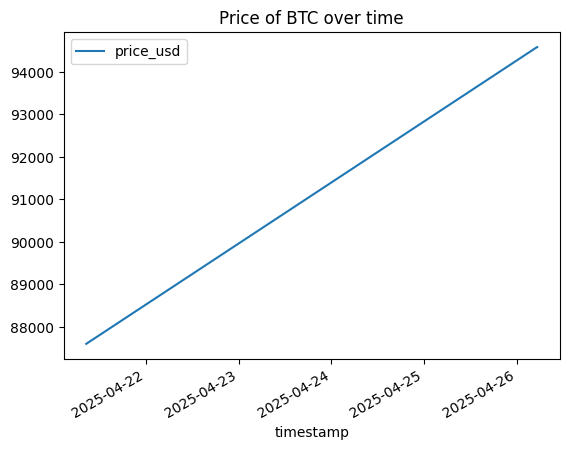

In [10]:
coin = 'btc'  # hoặc 'eth', 'bnb', ...
query = f"""
SELECT timestamp, price_usd
FROM fact_crypto_price
WHERE symbol = '{coin}'
ORDER BY timestamp
"""
df_btc = pd.read_sql(query, conn)
df_btc.plot(x='timestamp', y='price_usd', title=f"Price of {coin.upper()} over time")


Tính phần trăm thay đổi giá trung bình theo ngày:

In [13]:
query = """
SELECT symbol, AVG(percent_change_24h) as avg_change
FROM fact_crypto_price
GROUP BY symbol
ORDER BY avg_change DESC
LIMIT 10
"""
df_change = pd.read_sql(query, conn)
df_change


C:\Users\Tger\AppData\Local\Temp\ipykernel_21612\1241682862.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_change = pd.read_sql(query, conn)


,symbol,avg_change
0,bsv,31.227913
1,wld,15.817685
2,trump,12.738407
3,bonk,12.560405
4,fet,9.661335
5,jasmy,8.505737
6,kas,8.066717
7,pepe,7.303572
8,grt,6.979948
9,near,6.066848
